**`Unsupervised`** => Training using `unlabeled` data  
-> Find **`group`** in data with the number of group is K  
**_Mục tiêu (goal) của K-Means là phân nhóm (clustering) các điểm dữ liệu thành K cụm sao cho các điểm trong cùng một cụm càng giống nhau càng tốt, và càng khác với các cụm khác càng tốt._**  
=> **`labels for training data`**

In [1]:
%matplotlib inline

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

X = np.array([
    [1,1],
    [2,2],
    [2,3],
    [1,4],
    [3,3],
    [6,7],
    [7,8],
    [6,8],
    [7,6],
    [6,9],
    [2,5],
    [7,8],
    [8,9],
    [6,7],
    [7,8],
    [3,1],
    [8,4],
    [8,6],
    [8,9]
])

print(X[:5, :])

[[1 1]
 [2 2]
 [2 3]
 [1 4]
 [3 3]]


In [2]:
k = 3 # chia 3 cum
model = KMeans(n_clusters=k)

# train
model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [3]:
# predict
labels = model.predict(X)
print(labels)

centroids = model.cluster_centers_ # trung tam của từng cụm
print(centroids)

[1 1 1 1 1 2 0 0 2 0 1 0 0 2 0 1 2 2 0]
[[7.         8.42857143]
 [2.         2.71428571]
 [7.         6.        ]]


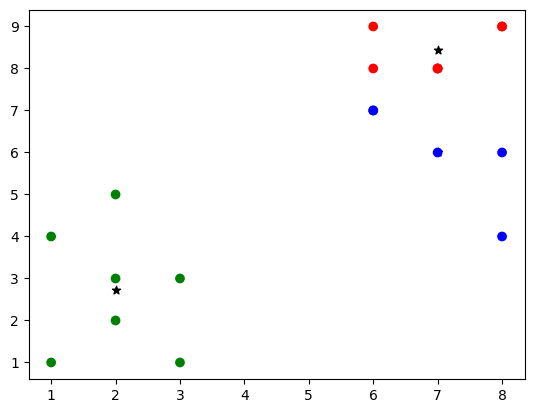

In [4]:
# plotting

import matplotlib.pyplot as plt

# plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='k')

color_map = ['r', 'g', 'b']
colors = [color_map[l] for l in labels]
plt.scatter(X[:, 0], X[:, 1], c=colors)

## **Finding the Optimal K** - using `sklearn.metrics.silhouette_samples`


2 -> 0.6897112069939448
3 -> 0.5578051985195768
4 -> 0.5074101670688612
5 -> 0.37236506980507333
6 -> 0.4202812803017777
7 -> 0.34647804732897297
8 -> 0.31516409351898256
9 -> 0.2931004418501601
10 -> 0.4597797618948823
11 -> 0.4176908848500207
12 -> 0.388351560865282
13 -> 0.39925191776983704
14 -> 0.383836485200708
15 -> 0.3684210526315789
16 -> 0.3684210526315789
17 -> 0.3684210526315789
18 -> 0.3684210526315789
best k: 2


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Text(0, 0.5, 'silhouette score')

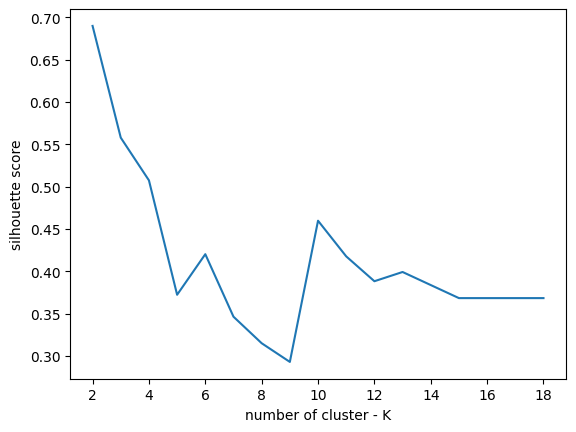

In [10]:
from sklearn.metrics import silhouette_score

sil_avgs = []

for k in range(2, len(X)):
    model = KMeans(n_clusters=k).fit(X)
    avg_score = silhouette_score(X, model.labels_)
    print(k, avg_score, sep=' -> ')
    sil_avgs.append(avg_score)


idx = sil_avgs.index(max(sil_avgs)) + 2
print(f'best k: {idx}')

plt.plot(range(2, len(X)), sil_avgs)
plt.xlabel('number of cluster - K')
plt.ylabel('silhouette score')
